In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium

### Joining partial datasets

In [2]:
csv1_filename = 'datasets/vacancies-partial-20220712.csv'
csv2_filename = 'datasets/vacancies-partial-moscow-20220712.csv'

In [3]:
df1 = pd.read_csv(csv1_filename, index_col=0)
df1.head()

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond,skills
vacancy_id,,,,,,,,,,,,,,,,,,
66764963,Маркетолог-аналитик,Межрегиональный ТранзитТелеком (АО МТТ),NaN,1,"Москва, Марксистская улица, 22с1",55.737694,37.660718,NaN,NaN,NaN,NaN,2022-07-11 08:19:16,2022-07-11 09:36:59,FULL_DAY,Высшее образование (техническое будет плюсом)....,Подготавливать план\факторный анализ по новому...,Оформление по ТК РФ с 1 дня. Возможность работ...,NaN
67595681,Аналитик клиентской эффективности,HeadHunter::Департамент клиентского сопровождения,HeadHunter::Департамент клиентского сопровождения,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-11 07:20:49,2022-07-11 07:20:51,FULL_DAY,являешься продвинутым пользователем Excel и др...,Основная задача аналитика клиентской эффективн...,Как будет устроен отбор на позицию: Удобное св...,NaN
67652647,Эксперт-аналитик CRM,ПЭК / Офис,ПЭК / Офис,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-11 09:20:38,2022-07-11 09:20:38,FULL_DAY,Опыт внедрения CRM-систем в крупной компании в...,"Аналитика деятельности CRM-системы, периодичес...","Работу в крупной транспортной компании, занима...",NaN
54587889,Middle/Senior Продуктовый аналитик в направлен...,HeadHunter::Analytics/Data Science,HeadHunter::Analytics/Data Science,1,"Москва, улица Годовикова, 9с10",55.809343,37.628505,NaN,NaN,NaN,NaN,2022-07-09 07:46:09,2022-07-09 07:46:09,FULL_DAY,"Знания в области AB-тестирования, современных ...",Проверка продуктовых гипотез для роста ключевы...,Интересные и сложные задачи в рамках ключевых ...,NaN
67551709,"Backend developer (Python, PostgreSQL)",Шамсуллин Рустам Радикович,NaN,1,"Москва, Лужнецкая набережная, 2/4с4",55.715489,37.573627,NaN,350000.0,RUR,False,2022-07-06 15:43:19,2022-07-11 19:15:48,FULL_DAY,NaN,Обработку спортивных он-лайн видео-трансляции....,Вторым этапом будет оплачиваемое тестовое зада...,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 66764963 to 67385118
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      7981 non-null   object 
 1   company_name      7981 non-null   object 
 2   company_dept      868 non-null    object 
 3   area              7981 non-null   int64  
 4   address           3945 non-null   object 
 5   latitude          3836 non-null   float64
 6   longitude         3836 non-null   float64
 7   salary_from       2679 non-null   float64
 8   salary_to         1735 non-null   float64
 9   salary_currency   3036 non-null   object 
 10  salary_gross      3030 non-null   object 
 11  publication_time  7981 non-null   object 
 12  last_changed      7981 non-null   object 
 13  schedule          7981 non-null   object 
 14  req               7927 non-null   object 
 15  resp              7951 non-null   object 
 16  cond              7515 non-null

In [5]:
df2 = pd.read_csv(csv2_filename, index_col=0)
df2.head()

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond,skills
vacancy_id,,,,,,,,,,,,,,,,,,
67551709,"Backend developer (Python, PostgreSQL)",Шамсуллин Рустам Радикович,NaN,1,"Москва, Лужнецкая набережная, 2/4с4",55.715489,37.573627,NaN,350000.0,RUR,False,2022-07-06 15:43:19,2022-07-11 19:15:48,FULL_DAY,NaN,Обработку спортивных он-лайн видео-трансляции....,Вторым этапом будет оплачиваемое тестовое зада...,NaN
67119378,Product Analyst (продуктовый аналитик),Мидлэнд Ритейл Груп,NaN,1,"Москва, улица Льва Толстого, 20",55.735439,37.584981,NaN,180000.0,RUR,False,2022-07-11 09:50:12,2022-07-11 10:00:13,FULL_DAY,Умение выбирать нужный способ оценки данных – ...,Взаимодействие со всеми продуктовыми командами...,Удаленку или офис в пешей доступности от Метро...,NaN
67547530,Аналитик,МСУ-1,NaN,1,"Москва, Ольховская улица, 49",55.778644,37.674418,120000.0,NaN,RUR,False,2022-07-11 06:42:04,2022-07-11 06:42:05,FULL_DAY,Опыт работы в строительстве и знание технологи...,Нормирование строительно-монтажных работ. Ресу...,Работа в крупной стабильной строительной компа...,NaN
67627301,Аналитик BI,А101,NaN,1,посёлок Коммунарка,55.570395,37.475495,NaN,NaN,NaN,NaN,2022-07-10 08:05:10,2022-07-11 06:31:47,FULL_DAY,Высшее физико-математическое или экономическое...,"Сбор данных из различных источников (1С, SQL, ...","Удаленный формат работы. График работы: 5/2, с...",NaN
67302297,Ведущий аналитик,Триафлай,NaN,1,"Москва, Турчанинов переулок, 6с2",55.737101,37.597199,200000.0,NaN,RUR,False,2022-07-10 14:12:28,2022-07-10 14:59:19,FULL_DAY,"...3х лет на позиции аналитика, включая опыт с...",Внедрение продукта конечному заказчику. Вендор...,Испытательный срок 3 месяца. Гибкий график (40...,NaN


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4467 entries, 67551709 to 66835012
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      4467 non-null   object 
 1   company_name      4467 non-null   object 
 2   company_dept      785 non-null    object 
 3   area              4467 non-null   int64  
 4   address           4090 non-null   object 
 5   latitude          4090 non-null   float64
 6   longitude         4090 non-null   float64
 7   salary_from       853 non-null    float64
 8   salary_to         544 non-null    float64
 9   salary_currency   988 non-null    object 
 10  salary_gross      988 non-null    object 
 11  publication_time  4467 non-null   object 
 12  last_changed      4467 non-null   object 
 13  schedule          4467 non-null   object 
 14  req               4439 non-null   object 
 15  resp              4463 non-null   object 
 16  cond              4315 non-null

In [7]:
df = pd.concat([df1, df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12448 entries, 66764963 to 66835012
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      12448 non-null  object 
 1   company_name      12448 non-null  object 
 2   company_dept      1653 non-null   object 
 3   area              12448 non-null  int64  
 4   address           8035 non-null   object 
 5   latitude          7926 non-null   float64
 6   longitude         7926 non-null   float64
 7   salary_from       3532 non-null   float64
 8   salary_to         2279 non-null   float64
 9   salary_currency   4024 non-null   object 
 10  salary_gross      4018 non-null   object 
 11  publication_time  12448 non-null  object 
 12  last_changed      12448 non-null  object 
 13  schedule          12448 non-null  object 
 14  req               12366 non-null  object 
 15  resp              12414 non-null  object 
 16  cond              11830 non-nu

Now we can see there are many Nan values. These Nans are mostly in location fields ('address', 'lat' and 'long') and salary (why?). And we can totally drop 'skills' column as it's empty

In [8]:
df.drop(columns='skills', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12448 entries, 66764963 to 66835012
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      12448 non-null  object 
 1   company_name      12448 non-null  object 
 2   company_dept      1653 non-null   object 
 3   area              12448 non-null  int64  
 4   address           8035 non-null   object 
 5   latitude          7926 non-null   float64
 6   longitude         7926 non-null   float64
 7   salary_from       3532 non-null   float64
 8   salary_to         2279 non-null   float64
 9   salary_currency   4024 non-null   object 
 10  salary_gross      4018 non-null   object 
 11  publication_time  12448 non-null  object 
 12  last_changed      12448 non-null  object 
 13  schedule          12448 non-null  object 
 14  req               12366 non-null  object 
 15  resp              12414 non-null  object 
 16  cond              11830 non-nu

In [9]:
df['area'].value_counts()

1       6467
2       1172
160      398
1002     288
3        287
        ... 
1447       1
2640       1
1444       1
1442       1
2115       1
Name: area, Length: 338, dtype: int64

In [10]:
df.index.value_counts()

67516367    7
67274056    6
67153059    6
66828230    6
67155665    6
           ..
51090925    1
67470825    1
67618630    1
54240185    1
66982768    1
Name: vacancy_id, Length: 8775, dtype: int64

In [11]:
df[df.index == 67516367]

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond
vacancy_id,,,,,,,,,,,,,,,,,
67516367,Системный аналитик,ЦРТ | Группа компаний,NaN,1,"Москва, улица Земляной Вал, 59с2",55.748716,37.657682,NaN,NaN,NaN,NaN,2022-07-11 06:47:53,2022-07-11 06:47:53,FULL_DAY,"Понимание принципов ООП, клиент-серверной архи...","Анализ, моделирование и документирование предм...","Сильная команда профессионалов, амбициозные за..."
67516367,Системный аналитик,ЦРТ | Группа компаний,NaN,1,"Москва, улица Земляной Вал, 59с2",55.748716,37.657682,NaN,NaN,NaN,NaN,2022-07-11 06:47:53,2022-07-11 06:47:53,FULL_DAY,"Понимание принципов ООП, клиент-серверной архи...","Анализ, моделирование и документирование предм...","Сильная команда профессионалов, амбициозные за..."
67516367,Системный аналитик,ЦРТ | Группа компаний,NaN,1,"Москва, улица Земляной Вал, 59с2",55.748716,37.657682,NaN,NaN,NaN,NaN,2022-07-11 06:47:53,2022-07-11 06:47:53,FULL_DAY,"Понимание принципов ООП, клиент-серверной архи...","Анализ, моделирование и документирование предм...","Сильная команда профессионалов, амбициозные за..."
67516367,Системный аналитик,ЦРТ | Группа компаний,NaN,1,"Москва, улица Земляной Вал, 59с2",55.748716,37.657682,NaN,NaN,NaN,NaN,2022-07-11 06:47:53,2022-07-11 06:47:53,FULL_DAY,"Понимание принципов ООП, клиент-серверной архи...","Анализ, моделирование и документирование предм...","Сильная команда профессионалов, амбициозные за..."
67516367,Системный аналитик,ЦРТ | Группа компаний,NaN,1,"Москва, улица Земляной Вал, 59с2",55.748716,37.657682,NaN,NaN,NaN,NaN,2022-07-11 06:47:53,2022-07-11 06:47:53,FULL_DAY,"Понимание принципов ООП, клиент-серверной архи...","Анализ, моделирование и документирование предм...","Сильная команда профессионалов, амбициозные за..."
67516367,Системный аналитик,ЦРТ | Группа компаний,NaN,1,"Москва, улица Земляной Вал, 59с2",55.748716,37.657682,NaN,NaN,NaN,NaN,2022-07-11 06:47:53,2022-07-11 06:47:53,FULL_DAY,"Понимание принципов ООП, клиент-серверной архи...","Анализ, моделирование и документирование предм...","Сильная команда профессионалов, амбициозные за..."
67516367,Системный аналитик,ЦРТ | Группа компаний,NaN,1,"Москва, улица Земляной Вал, 59с2",55.748716,37.657682,NaN,NaN,NaN,NaN,2022-07-11 06:47:53,2022-07-11 06:47:53,FULL_DAY,"Понимание принципов ООП, клиент-серверной архи...","Анализ, моделирование и документирование предм...","Сильная команда профессионалов, амбициозные за..."


In [12]:
print(len(df[df.duplicated() == False]))
print((~df.duplicated()).sum())

8894
8894


In [13]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8894 entries, 66764963 to 66982768
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      8894 non-null   object 
 1   company_name      8894 non-null   object 
 2   company_dept      1143 non-null   object 
 3   area              8894 non-null   int64  
 4   address           5078 non-null   object 
 5   latitude          4980 non-null   float64
 6   longitude         4980 non-null   float64
 7   salary_from       2786 non-null   float64
 8   salary_to         1809 non-null   float64
 9   salary_currency   3170 non-null   object 
 10  salary_gross      3165 non-null   object 
 11  publication_time  8894 non-null   object 
 12  last_changed      8894 non-null   object 
 13  schedule          8894 non-null   object 
 14  req               8841 non-null   object 
 15  resp              8871 non-null   object 
 16  cond              8450 non-null

In [14]:
#df.to_csv('datasets/vacancies-no-duplicates-20220712.csv')

### Analyzing whole dataset

In [41]:
df = pd.read_csv('datasets/vacancies-no-duplicates-20220712.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8894 entries, 66764963 to 66982768
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      8894 non-null   object 
 1   company_name      8894 non-null   object 
 2   company_dept      1143 non-null   object 
 3   area              8894 non-null   int64  
 4   address           5078 non-null   object 
 5   latitude          4980 non-null   float64
 6   longitude         4980 non-null   float64
 7   salary_from       2786 non-null   float64
 8   salary_to         1809 non-null   float64
 9   salary_currency   3170 non-null   object 
 10  salary_gross      3165 non-null   object 
 11  publication_time  8894 non-null   object 
 12  last_changed      8894 non-null   object 
 13  schedule          8894 non-null   object 
 14  req               8841 non-null   object 
 15  resp              8871 non-null   object 
 16  cond              8450 non-null

In [16]:
len(df[df['salary_from'].isna() & df['salary_to'].isna()])

5724

In [17]:
df['salary_currency'].value_counts()

RUR    2915
KZT     127
USD      53
BYR      35
EUR      19
UZS      17
KGS       4
Name: salary_currency, dtype: int64

In [32]:
moscow_map = folium.Map(location=[df.iloc[0, 5], df.iloc[0, 6]], zoom_start=12)

In [19]:
vacancies_msk = df[(df['area'] == 1) & (df['latitude'].notna()) & (df['longitude'].notna())].iloc[:10, :]
vacancies_msk

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond
vacancy_id,,,,,,,,,,,,,,,,,
66764963,Маркетолог-аналитик,Межрегиональный ТранзитТелеком (АО МТТ),NaN,1,"Москва, Марксистская улица, 22с1",55.737694,37.660718,NaN,NaN,NaN,NaN,2022-07-11 08:19:16,2022-07-11 09:36:59,FULL_DAY,Высшее образование (техническое будет плюсом)....,Подготавливать план\факторный анализ по новому...,Оформление по ТК РФ с 1 дня. Возможность работ...
54587889,Middle/Senior Продуктовый аналитик в направлен...,HeadHunter::Analytics/Data Science,HeadHunter::Analytics/Data Science,1,"Москва, улица Годовикова, 9с10",55.809343,37.628505,NaN,NaN,NaN,NaN,2022-07-09 07:46:09,2022-07-09 07:46:09,FULL_DAY,"Знания в области AB-тестирования, современных ...",Проверка продуктовых гипотез для роста ключевы...,Интересные и сложные задачи в рамках ключевых ...
67551709,"Backend developer (Python, PostgreSQL)",Шамсуллин Рустам Радикович,NaN,1,"Москва, Лужнецкая набережная, 2/4с4",55.715489,37.573627,NaN,350000.0,RUR,False,2022-07-06 15:43:19,2022-07-11 19:15:48,FULL_DAY,NaN,Обработку спортивных он-лайн видео-трансляции....,Вторым этапом будет оплачиваемое тестовое зада...
66075789,Middle/Senior продуктовый аналитик в направлен...,HeadHunter::Product Management,HeadHunter::Product Management,1,"Москва, улица Годовикова, 9с10",55.809343,37.628505,NaN,NaN,NaN,NaN,2022-07-09 07:46:09,2022-07-09 07:46:09,FULL_DAY,"...области анализа данных (воронки, когортный ...","Проектировать, сопровождать и оптимизировать с...",Интересные и сложные задачи в рамках ключевых ...
67650008,Аналитик BI,Sminex,NaN,1,"Москва, Кадашёвская набережная, 6/1/2",55.742706,37.617734,180000.0,240000.0,RUR,False,2022-07-11 08:41:40,2022-07-11 14:27:24,FULL_DAY,Опыт работы аналитиком от 2-х лет. Опыт продви...,Ставить технические задачи на выгрузку данных ...,"Разнообразие проектов, сложные и интересные за..."
67664019,Старший аналитик данных,ShinSale,NaN,1,"Москва, улица Бутлерова, 17",55.650150,37.539626,140000.0,200000.0,RUR,False,2022-07-11 12:38:02,2022-07-11 12:38:02,FULL_DAY,Понимание грамотного построения инфраструктуры...,"Определить формат основных дашбордов, запрашив...","Оформление по ТК РФ, белая з/п точно в срок. Г..."
67472214,Data Analyst,КИБЕР-РОМ,NaN,1,"Москва, Рочдельская улица, 15с27",55.754836,37.560565,150000.0,250000.0,RUR,True,2022-07-10 15:02:16,2022-07-10 15:59:17,FULL_DAY,Применение Python в прикладных задачах. Опыт в...,Игровые проекты. Системы рекомендаций и модера...,Стильный просторный лофт на территории Трехгор...
49495729,Ведущий аналитик данных (Департамент закупок),"Красное & Белое, розничная сеть",NaN,1,"Москва, 1-й Красногвардейский проезд, 15",55.750520,37.539401,NaN,300000.0,RUR,False,2022-07-11 07:21:57,2022-07-11 07:21:57,FULL_DAY,"Навыки выдвижения и проверки гипотез, прогнози...","Выявление узких мест, факторов отклонений. Сис...","График работы: пятидневная рабочая неделя, с 9..."
67666515,Аналитик данных / разработчик дашбордов,Сфера,NaN,1,"Москва, Калининская линия",55.758407,37.751538,60000.0,NaN,RUR,False,2022-07-11 13:30:36,2022-07-11 19:37:31,REMOTE,Навыки выявления требований к отчетам/дашборда...,Анализ данных для разработки отчетов. Написани...,Полностью удалённый формат работы. Свободный д...


In [20]:
job_places_msk = folium.map.FeatureGroup()
for n in range(len(vacancies_msk)):
    job_places_msk.add_child(folium.features.CircleMarker([vacancies_msk.iloc[n, 5], vacancies_msk.iloc[n, 6]], radius=3, color='red', fill_color='red'))

In [21]:
moscow_map.add_child(job_places_msk)
moscow_map

In [22]:
from folium.plugins import HeatMap

In [33]:
data = []
for n in range(len(vacancies_msk)):
    data.append([vacancies_msk.iloc[n, 5], vacancies_msk.iloc[n, 6]])
#data.pop(3)
data

[[55.737694, 37.660718],
 [55.809343, 37.628505],
 [55.715489, 37.573627],
 [55.809343, 37.628505],
 [55.742706, 37.617734],
 [55.65015, 37.539626],
 [55.754836, 37.560565],
 [55.75052, 37.539401],
 [55.758407, 37.751538],
 [55.769423, 37.559371]]

In [34]:
HeatMap(data).add_to(folium.FeatureGroup(name='Heat map').add_to(moscow_map))
folium.LayerControl().add_to(moscow_map)
moscow_map

In [35]:
vacancies_msk_with_salary = df[(df['area'] == 1) & df['latitude'].notna() & df['longitude'].notna() & ((df['salary_from'].notna()) | (df['salary_to'].notna()))]
vacancies_msk_with_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 67551709 to 66807749
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      590 non-null    object 
 1   company_name      590 non-null    object 
 2   company_dept      22 non-null     object 
 3   area              590 non-null    int64  
 4   address           590 non-null    object 
 5   latitude          590 non-null    float64
 6   longitude         590 non-null    float64
 7   salary_from       500 non-null    float64
 8   salary_to         336 non-null    float64
 9   salary_currency   590 non-null    object 
 10  salary_gross      590 non-null    object 
 11  publication_time  590 non-null    object 
 12  last_changed      590 non-null    object 
 13  schedule          590 non-null    object 
 14  req               584 non-null    object 
 15  resp              590 non-null    object 
 16  cond              579 non-null  

In [36]:
vacancies_msk_with_salary['salary_currency'].value_counts()

RUR    589
USD      1
Name: salary_currency, dtype: int64

In [37]:
vacancies_msk_with_salary['salary_gross'].value_counts()

False    393
True     197
Name: salary_gross, dtype: int64

In [38]:
df_msk_sal = vacancies_msk_with_salary
vacancies_msk_with_salary = None
df_msk_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 67551709 to 66807749
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vacancy_name      590 non-null    object 
 1   company_name      590 non-null    object 
 2   company_dept      22 non-null     object 
 3   area              590 non-null    int64  
 4   address           590 non-null    object 
 5   latitude          590 non-null    float64
 6   longitude         590 non-null    float64
 7   salary_from       500 non-null    float64
 8   salary_to         336 non-null    float64
 9   salary_currency   590 non-null    object 
 10  salary_gross      590 non-null    object 
 11  publication_time  590 non-null    object 
 12  last_changed      590 non-null    object 
 13  schedule          590 non-null    object 
 14  req               584 non-null    object 
 15  resp              590 non-null    object 
 16  cond              579 non-null  

In [43]:
usd_rur_ratio = 60
df_msk_sal['salary_from_rur'] = df_msk_sal.apply(lambda x: x['salary_from'] if x['salary_currency'] in ['RUR', np.NAN] else x['salary_from']*usd_rur_ratio, axis=1)
df_msk_sal['salary_to_rur'] = df_msk_sal.apply(lambda x: x['salary_to'] if x['salary_currency'] in ['RUR', np.NAN] else x['salary_to']*usd_rur_ratio, axis=1)
df_msk_sal[df_msk_sal['salary_currency'] == 'USD']

C:\Users\sharu\AppData\Local\Temp\ipykernel_12320\881088992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal['salary_from_rur'] = df_msk_sal.apply(lambda x: x['salary_from'] if x['salary_currency'] in ['RUR', np.NAN] else x['salary_from']*usd_rur_ratio, axis=1)
C:\Users\sharu\AppData\Local\Temp\ipykernel_12320\881088992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal['salary_to_rur'] = df_msk_sal.apply(lambda x: x['salary_to'] if x['salary_currency'] in ['RUR', np.NAN] else x['s

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,salary_gross,publication_time,last_changed,schedule,req,resp,cond,salary_from_rur,salary_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,
52563104,UX исследователь / UX Researcher,AMarkets,NaN,1,Подгорица,42.435426,19.263895,NaN,2500.0,USD,False,2022-07-11 18:50:23,2022-07-11 19:19:26,FULL_DAY,Умение работать с веб-аналитикой. Опыт обработ...,Организовать процесс UX-тестирований (web и mo...,Релокацию в европейское подразделение компании...,NaN,150000.0


In [44]:
df_msk_sal['net_income_from_rur'] = df_msk_sal.apply(lambda x: x['salary_from_rur']*0.87 if x['salary_gross'] else x['salary_from_rur'], axis=1)
df_msk_sal['net_income_to_rur'] = df_msk_sal.apply(lambda x: x['salary_to_rur']*0.87 if x['salary_gross'] else x['salary_to_rur'], axis=1)
df_msk_sal.head()

C:\Users\sharu\AppData\Local\Temp\ipykernel_12320\173079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal['net_income_from_rur'] = df_msk_sal.apply(lambda x: x['salary_from_rur']*0.87 if x['salary_gross'] else x['salary_from_rur'], axis=1)
C:\Users\sharu\AppData\Local\Temp\ipykernel_12320\173079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal['net_income_to_rur'] = df_msk_sal.apply(lambda x: x['salary_to_rur']*0.87 if x['salary_gross'] else x['salary_to_rur'], axis=1)


,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,publication_time,last_changed,schedule,req,resp,cond,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,,,
67551709,"Backend developer (Python, PostgreSQL)",Шамсуллин Рустам Радикович,NaN,1,"Москва, Лужнецкая набережная, 2/4с4",55.715489,37.573627,NaN,350000.0,RUR,...,2022-07-06 15:43:19,2022-07-11 19:15:48,FULL_DAY,NaN,Обработку спортивных он-лайн видео-трансляции....,Вторым этапом будет оплачиваемое тестовое зада...,NaN,350000.0,NaN,350000.0
67650008,Аналитик BI,Sminex,NaN,1,"Москва, Кадашёвская набережная, 6/1/2",55.742706,37.617734,180000.0,240000.0,RUR,...,2022-07-11 08:41:40,2022-07-11 14:27:24,FULL_DAY,Опыт работы аналитиком от 2-х лет. Опыт продви...,Ставить технические задачи на выгрузку данных ...,"Разнообразие проектов, сложные и интересные за...",180000.0,240000.0,180000.0,240000.0
67664019,Старший аналитик данных,ShinSale,NaN,1,"Москва, улица Бутлерова, 17",55.650150,37.539626,140000.0,200000.0,RUR,...,2022-07-11 12:38:02,2022-07-11 12:38:02,FULL_DAY,Понимание грамотного построения инфраструктуры...,"Определить формат основных дашбордов, запрашив...","Оформление по ТК РФ, белая з/п точно в срок. Г...",140000.0,200000.0,140000.0,200000.0
67472214,Data Analyst,КИБЕР-РОМ,NaN,1,"Москва, Рочдельская улица, 15с27",55.754836,37.560565,150000.0,250000.0,RUR,...,2022-07-10 15:02:16,2022-07-10 15:59:17,FULL_DAY,Применение Python в прикладных задачах. Опыт в...,Игровые проекты. Системы рекомендаций и модера...,Стильный просторный лофт на территории Трехгор...,150000.0,250000.0,130500.0,217500.0
49495729,Ведущий аналитик данных (Департамент закупок),"Красное & Белое, розничная сеть",NaN,1,"Москва, 1-й Красногвардейский проезд, 15",55.750520,37.539401,NaN,300000.0,RUR,...,2022-07-11 07:21:57,2022-07-11 07:21:57,FULL_DAY,"Навыки выдвижения и проверки гипотез, прогнози...","Выявление узких мест, факторов отклонений. Сис...","График работы: пятидневная рабочая неделя, с 9...",NaN,300000.0,NaN,300000.0


In [45]:
df_msk_sal[df_msk_sal['salary_gross']].iloc[:5, :]

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,publication_time,last_changed,schedule,req,resp,cond,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur
vacancy_id,,,,,,,,,,,,,,,,,,,,,
67472214,Data Analyst,КИБЕР-РОМ,NaN,1,"Москва, Рочдельская улица, 15с27",55.754836,37.560565,150000.0,250000.0,RUR,...,2022-07-10 15:02:16,2022-07-10 15:59:17,FULL_DAY,Применение Python в прикладных задачах. Опыт в...,Игровые проекты. Системы рекомендаций и модера...,Стильный просторный лофт на территории Трехгор...,150000.0,250000.0,130500.0,217500.0
66877134,Аналитик SQL,Группа Актион,NaN,1,"Москва, 1-й Земельный переулок, 7/2",55.769423,37.559371,90000.0,130000.0,RUR,...,2022-07-11 05:46:53,2022-07-11 05:46:53,REMOTE,"Имеет высшее профильное образование, дружит с ...",Предстоит трудиться в различных жанрах: Обновл...,Работу в крупнейшем медиа холдинге. Офис в 5-т...,90000.0,130000.0,78300.0,113100.0
66982374,Аналитик,ФГБНУ Аналитический центр,NaN,1,"Москва, улица Талалихина, 33с4",55.731065,37.682089,100000.0,NaN,RUR,...,2022-07-11 07:47:35,2022-07-11 07:59:57,FULL_DAY,Знание законодательства РФ и иных нормативных ...,...по совершенствованию порядка предоставления...,NaN,100000.0,NaN,87000.0,NaN
67363658,Старший системный аналитик,Системы Распределенного Реестра,NaN,1,"Москва, Композиторская улица, 17",55.751229,37.586311,280000.0,300000.0,RUR,...,2022-07-12 07:35:02,2022-07-12 08:00:53,REMOTE,Опыт работы в IT Компаниях на аналогичной долж...,Диаграмма бизнес-процессов и информационных по...,"Полностью “белая” зарплата, оформление по ТК Р...",280000.0,300000.0,243600.0,261000.0
67684081,Стажер-аналитик,Райффайзен Банк,NaN,1,"Москва, проспект Андропова, 18к2",55.695611,37.662371,NaN,60000.0,RUR,...,2022-07-12 06:44:14,2022-07-12 06:51:47,FULL_DAY,Образование: выпускник или студент последних к...,Участие в подготовке регулярной отчетности для...,Официальное трудоустройство в штат на срочный ...,NaN,60000.0,NaN,52200.0


In [46]:
df_msk_sal_range = df_msk_sal[df_msk_sal['salary_from'].notna() & df_msk_sal['salary_to'].notna()]
df_msk_sal_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 67650008 to 50804500
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vacancy_name         246 non-null    object 
 1   company_name         246 non-null    object 
 2   company_dept         8 non-null      object 
 3   area                 246 non-null    int64  
 4   address              246 non-null    object 
 5   latitude             246 non-null    float64
 6   longitude            246 non-null    float64
 7   salary_from          246 non-null    float64
 8   salary_to            246 non-null    float64
 9   salary_currency      246 non-null    object 
 10  salary_gross         246 non-null    object 
 11  publication_time     246 non-null    object 
 12  last_changed         246 non-null    object 
 13  schedule             246 non-null    object 
 14  req                  244 non-null    object 
 15  resp                 246 non

In [61]:
net_min_salary_weights = list(df_msk_sal_range['net_income_from_rur'] / max(df_msk_sal_range['net_income_from_rur']))
moscow_map = folium.Map(location=[df_msk_sal_range.iloc[0, 5], df_msk_sal_range.iloc[0, 6]], zoom_start=11)
data = []
for n in range(len(df_msk_sal_range)):
    data.append([df_msk_sal_range.iloc[n, 5], df_msk_sal_range.iloc[n, 6], net_min_salary_weights[n]])
HeatMap(data, radius=15).add_to(folium.FeatureGroup(name='Heat map').add_to(moscow_map))
folium.LayerControl().add_to(moscow_map)
moscow_map

<AxesSubplot:>

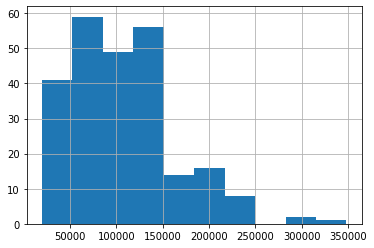

In [57]:
df_msk_sal_range['net_income_from_rur'].hist()

<AxesSubplot:>

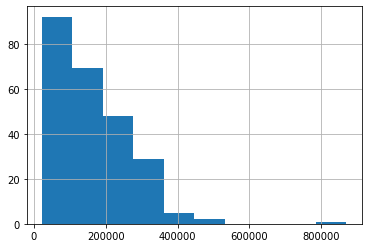

In [62]:
df_msk_sal_range['net_income_to_rur'].hist()

In [68]:
df_msk_sal_range['top_bottom_net_income_ratio'] = df_msk_sal_range['net_income_to_rur'] / df_msk_sal_range['net_income_from_rur']

C:\Users\sharu\AppData\Local\Temp\ipykernel_12320\659412442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_msk_sal_range['top_bottom_net_income_ratio'] = df_msk_sal_range['net_income_to_rur'] / df_msk_sal_range['net_income_from_rur']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


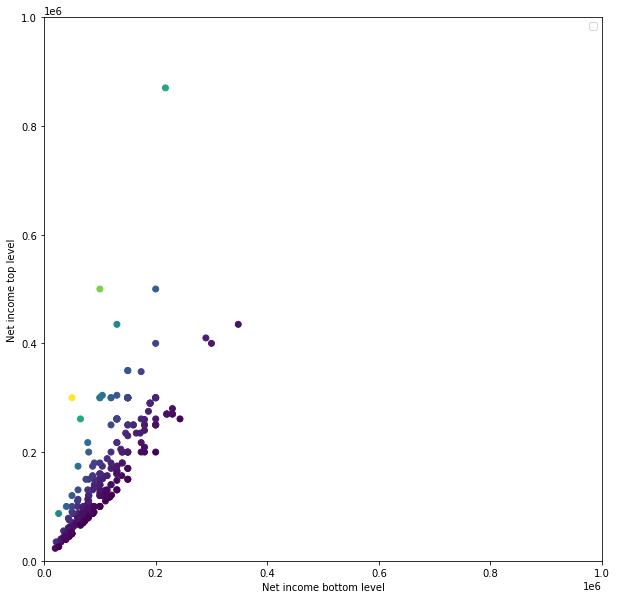

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(df_msk_sal_range['net_income_from_rur'], df_msk_sal_range['net_income_to_rur'], c=df_msk_sal_range['top_bottom_net_income_ratio'])
ax.set_xlim(left=0, right=1000000)
ax.set_ylim(bottom=0, top=1000000)
ax.set_xlabel('Net income bottom level')
ax.set_ylabel('Net income top level')
ax.legend();

<AxesSubplot:>

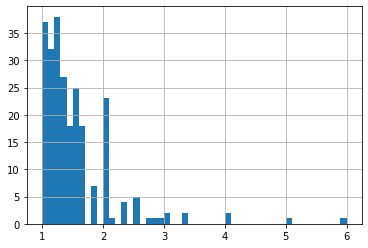

In [73]:
df_msk_sal_range['top_bottom_net_income_ratio'].hist(bins=50)

In [78]:
min_ratio = min(df_msk_sal_range['top_bottom_net_income_ratio'])
df_msk_sal_range[df_msk_sal_range['top_bottom_net_income_ratio'] == min_ratio].iloc[:5, :]

,vacancy_name,company_name,company_dept,area,address,latitude,longitude,salary_from,salary_to,salary_currency,...,last_changed,schedule,req,resp,cond,salary_from_rur,salary_to_rur,net_income_from_rur,net_income_to_rur,top_bottom_net_income_ratio
vacancy_id,,,,,,,,,,,,,,,,,,,,,
67526996,Младший аналитик,ГКБ ИМ. И.В. ДАВЫДОВСКОГО ДЗМ,NaN,1,"Москва, Яузская улица, 11",55.746927,37.648214,45000.0,45000.0,RUR,...,2022-07-11 08:51:53,FULL_DAY,Высшее образование. Опыт работы от года. Опытн...,...установленной ежедневной отчетности(несколь...,"Работа в современной, высокотехнологичной мног...",45000.0,45000.0,45000.0,45000.0,1.0
67669742,Стажер (продуктовый аналитик),L’etoile Digital,NaN,1,"Москва, Одесская улица, 2кА",55.664472,37.599238,30000.0,30000.0,RUR,...,2022-07-11 14:56:39,FULL_DAY,"Обладаешь знанием в области AB-тестирования, с...",Проведение проверки продуктовых гипотез для ро...,Стажерская программа предусмотрена для студент...,30000.0,30000.0,26100.0,26100.0,1.0
67599030,Системный аналитик JUNE,Sitronics Group,NaN,1,"Москва, Волгоградский проспект, 32к31",55.718659,37.689905,50000.0,50000.0,RUR,...,2022-07-11 08:21:17,FULL_DAY,Профильное образованием или законченные курсы ...,Создание и согласование проектной документации...,Интересная работа в динамичной ИТ компании. Ко...,50000.0,50000.0,50000.0,50000.0,1.0
67473710,Аналитик,Центр развития Среда возможностей,NaN,1,"Москва, Волгоградский проспект, 42",55.705858,37.725487,150000.0,150000.0,RUR,...,2022-07-04 16:17:14,FULL_DAY,"...массивов данных, описания тенденций, формир...",Формировать презентационные материалы компании...,"Пятидневная рабочая неделя (суббота, воскресен...",150000.0,150000.0,130500.0,130500.0,1.0
67532829,Аналитик,ФБУЗ ФЦГиЭ Роспотребнадзора,NaN,1,"Москва, Варшавское шоссе, 19А",55.695829,37.623349,45000.0,45000.0,RUR,...,2022-07-06 12:08:40,FULL_DAY,Склонность к анализу информации и теоретическо...,Подготовка стандартизированной отчетности. Раз...,"Понедельник - пятница с 9.00 до 17.30 час., су...",45000.0,45000.0,45000.0,45000.0,1.0
67511084,Бизнес-аналитик (проект Data governance),Отраслевой центр разработки и внедрения информ...,NaN,1,"Москва, Каланчевская, 13",55.771211,37.651313,135000.0,135000.0,RUR,...,2022-07-05 13:53:15,FULL_DAY,Будет преимуществом: опыт работы в data govern...,"Обследование бизнес-процессов, подлежащих авто...",Работа в крупной стабильной компании. Участие ...,135000.0,135000.0,117450.0,117450.0,1.0
67285843,Аналитик,Центр развития Среда возможностей,NaN,1,"Москва, Волгоградский проспект, 42к13",55.710190,37.721265,150000.0,150000.0,RUR,...,2022-07-11 08:17:35,FULL_DAY,Опыт работы с информацией по следующей тематик...,Формировать презентационные материалы компании...,Официальное трудоустройство в подведомственное...,150000.0,150000.0,130500.0,130500.0,1.0
67126743,Ассистент аналитика,ANCOR,ANCOR,1,"Москва, бульвар Энтузиастов, 2",55.746363,37.682077,50000.0,50000.0,RUR,...,2022-07-12 06:31:01,FULL_DAY,"Владение ПК: Excel, Power Point, на уровне уве...","Работа с базами данных (адресные программы, ма...",Оформление по ТК. Заработная плата 50 000 рубл...,50000.0,50000.0,50000.0,50000.0,1.0
67104426,Аналитик,Федорово Минералз,NaN,1,"Москва, Западный административный округ, Можай...",55.695256,37.347081,80000.0,80000.0,RUR,...,2022-06-23 08:35:24,FULL_DAY,Отличное знание Excel. Умение работать с больш...,Ведение аналитических данных формирования лото...,Работа в современном офисе в Сколково с 09.00 ...,80000.0,80000.0,69600.0,69600.0,1.0


In [ ]:
moscow_map = folium.Map(location=[df_msk_sal_range.iloc[0, 5], df_msk_sal_range.iloc[0, 6]], zoom_start=11)
job_places_msk = folium.map.FeatureGroup()
for n in range(len(vacancies_msk)):
    job_places_msk.add_child(folium.features.CircleMarker([vacancies_msk.iloc[n, 5], vacancies_msk.iloc[n, 6]], radius=3, color='red', fill_color='red'))
moscow_map.add_child(job_places_msk)
moscow_map